In [138]:
# Loading in necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score

In [139]:
# Defining functions to use for visualizations
def plot_pred_vs_actual(y_true, y_pred, title = 'Predicted vs Actual'):
    '''
    Plots predicted vs actual values with:
      - Red dashed line: perfect prediction (y = x)
      - Green line: best-fit line of predictions
    '''
    plt.figure(figsize = (8, 6))
    
    # Scatter plot of predictions vs. actual 
    sns.scatterplot(x = y_true, y = y_pred, s = 60, alpha = 0.7)
    
    # Perfect prediction line (y = x)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    sns.lineplot(x = [min_val, max_val], y = [min_val, max_val], color = 'red', linestyle = '--', label = 'Perfect Prediction')
    
    # Best-fit line
    m, b = np.polyfit(y_true, y_pred, 1)
    sns.lineplot(x = y_true, 
                 y = m * y_true + b, 
                 color = 'green', 
                 label = 'Best Fit Line'
                )
    plt.xlabel('Actual', fontsize = 12, weight = 'bold')
    plt.ylabel('Predicted', fontsize = 12, weight = 'bold')
    plt.title(title, fontsize = 14, weight = 'bold')
    plt.legend()
    sns.despine()
    plt.grid(alpha = 0.3)
    plt.show()

def plot_model_importances(model, features, title = 'Feature Coefficients'):
    '''
    Plots feature coefficients for a given model and feature names
    '''
    coefs = model.named_steps['reg'].coef_
    xlabel = 'Coefficient'
    
    # Creating dataframe with feature names and importances
    df = pd.DataFrame({
        'Feature': features,
        'Coefficient': coefs
    }).sort_values(by = 'Coefficient', ascending = False)
    
    # Normalizing for the colormap
    norm = Normalize(vmin = -np.max(np.abs(df['Coefficient'])), vmax = np.max(np.abs(df['Coefficient'])))
    colors = list(plt.cm.coolwarm_r(norm(df['Coefficient'].values)))  
    
    # Plotting with Seaborn 
    plt.figure(figsize = (10, 6))
    sns.barplot(
        x = 'Coefficient',
        y = 'Feature',
        data = df,
        hue = 'Feature',        
        palette = colors,
        dodge = False,
        legend = False
    )
    plt.xlabel(xlabel, fontsize = 12, weight = 'bold')
    plt.ylabel('Feature', fontsize = 12, weight = 'bold')
    plt.title(title, fontsize = 14, weight = 'bold')
    plt.axvline(0, color = 'black', linestyle = '--', linewidth = 1)
    plt.grid(alpha = 0.3)
    sns.despine()
    plt.show()


In [140]:
# Loading in the best model for each position
model_qb = joblib.load('../models/best_model_qb.pkl')
model_rb = joblib.load('../models/best_model_rb.pkl')
model_wr = joblib.load('../models/best_model_wr.pkl')
model_te = joblib.load('../models/best_model_te.pkl')

In [141]:
# Loading in the X and y data for the validation sets
X_val_qb = joblib.load('../data/processed/X_val_qb.pkl')
X_val_rb = joblib.load('../data/processed/X_val_rb.pkl')
X_val_wr = joblib.load('../data/processed/X_val_wr.pkl')
X_val_te = joblib.load('../data/processed/X_val_te.pkl')

y_val_qb = joblib.load('../data/processed/y_val_qb.pkl')
y_val_rb = joblib.load('../data/processed/y_val_rb.pkl')
y_val_wr = joblib.load('../data/processed/y_val_wr.pkl')
y_val_te = joblib.load('../data/processed/y_val_te.pkl')

In [142]:
# Previewing the model pipeline (QB)
model_qb

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg', Ridge(alpha=80, max_iter=5000))])

RMSE on Validation Set (QB): 3.57
MAE on Validation Set (QB): 2.58
R^2 on Validation Set (QB): 0.088



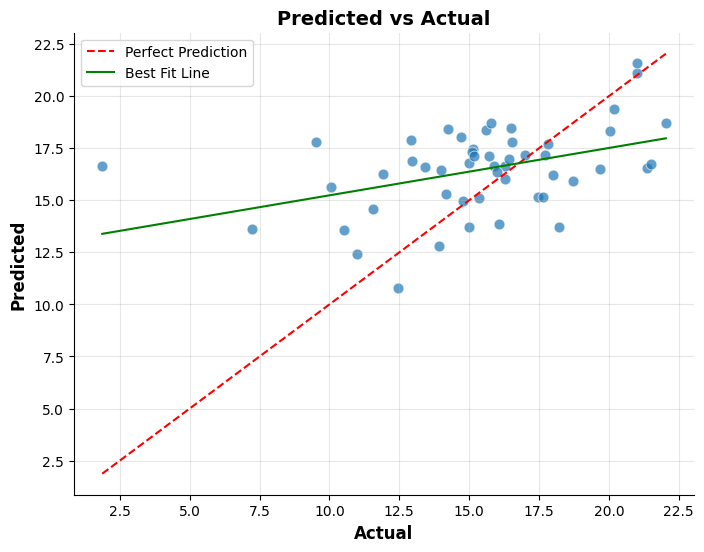

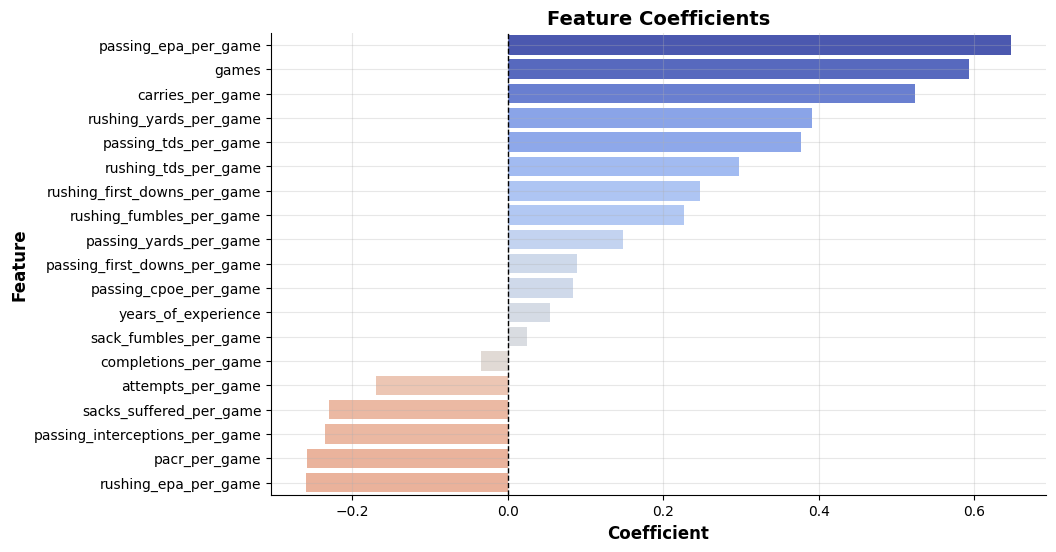

In [143]:
# Calculating and presenting evaluation metrics/graphs for the model

y_pred_qb = model_qb.predict(X_val_qb)

rmse_qb = MSE(y_val_qb, y_pred_qb)**.5
mae_qb = MAE(y_val_qb, y_pred_qb)
r2_qb = r2_score(y_val_qb, y_pred_qb)

print(f'RMSE on Validation Set (QB): {rmse_qb:.2f}')
print(f'MAE on Validation Set (QB): {mae_qb:.2f}')
print(f'R^2 on Validation Set (QB): {r2_qb:.3f}\n')

columns_qb = X_val_qb.columns

plot_pred_vs_actual(y_val_qb, y_pred_qb, title = 'Predicted vs Actual')

print('\n')

plot_model_importances(model_qb, columns_qb)

In [144]:
# Previewing the model pipeline (RB)
model_rb

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg', Lasso(alpha=0.1, max_iter=5000))])

RMSE on Validation Set (RB): 3.92
MAE on Validation Set (RB): 3.14
R^2 on Validation Set (RB): 0.499



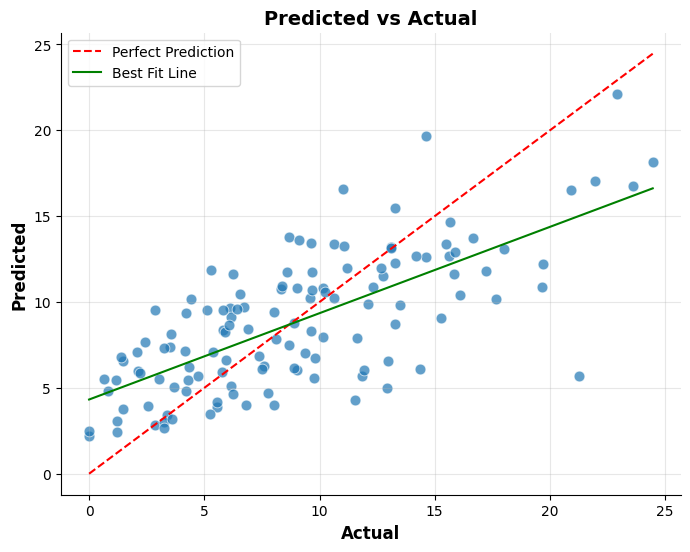

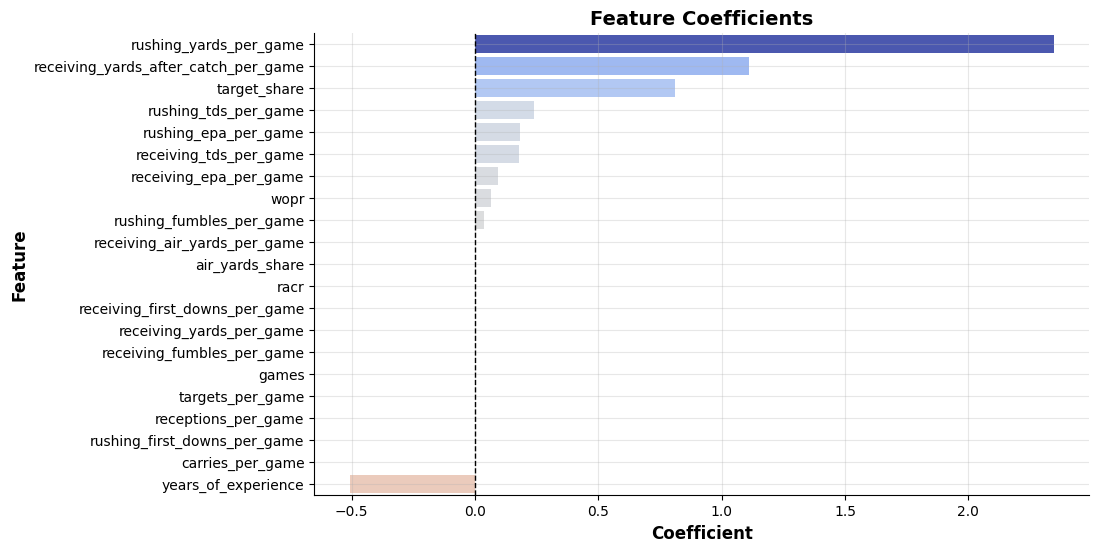

In [145]:
# Calculating and presenting evaluation metrics/graphs for the model
y_pred_rb = model_rb.predict(X_val_rb)

rmse_rb = MSE(y_val_rb, y_pred_rb)**.5
mae_rb = MAE(y_val_rb, y_pred_rb)
r2_rb = r2_score(y_val_rb, y_pred_rb)

print(f'RMSE on Validation Set (RB): {rmse_rb:.2f}')
print(f'MAE on Validation Set (RB): {mae_rb:.2f}')
print(f'R^2 on Validation Set (RB): {r2_rb:.3f}\n')

columns_rb = X_val_rb.columns

plot_pred_vs_actual(y_val_rb, y_pred_rb, title = 'Predicted vs Actual')

print('\n')

plot_model_importances(model_rb, columns_rb)

In [146]:
# Previewing the model pipeline (WR)
model_wr

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg', Ridge(alpha=50, max_iter=5000))])

RMSE on Validation Set (WR): 3.32
MAE on Validation Set (WR): 2.67
R^2 on Validation Set (WR): 0.611



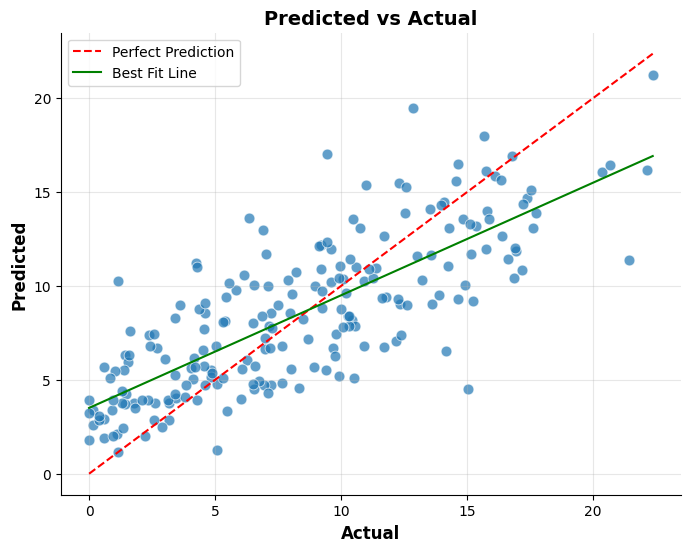

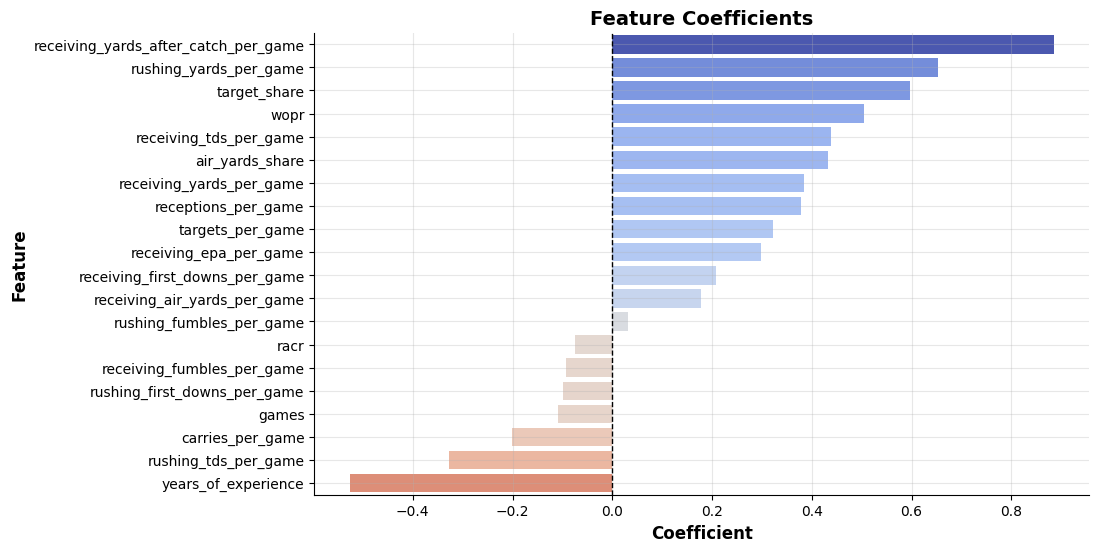

In [147]:
# Calculating and presenting evaluation metrics/graphs for the model
y_pred_wr = model_wr.predict(X_val_wr)

rmse_wr = MSE(y_val_wr, y_pred_wr)**.5
mae_wr = MAE(y_val_wr, y_pred_wr)
r2_wr = r2_score(y_val_wr, y_pred_wr)

print(f'RMSE on Validation Set (WR): {rmse_wr:.2f}')
print(f'MAE on Validation Set (WR): {mae_wr:.2f}')
print(f'R^2 on Validation Set (WR): {r2_wr:.3f}\n')

columns_wr = X_val_wr.columns

plot_pred_vs_actual(y_val_wr, y_pred_wr, title = 'Predicted vs Actual')

print('\n')

plot_model_importances(model_wr, columns_wr)

In [148]:
# Previewing the model pipeline (TE)
model_te

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg', Lasso(alpha=0.1, max_iter=5000))])

RMSE on Validation Set (TE): 2.73
MAE on Validation Set (TE): 2.01
R^2 on Validation Set (TE): 0.524



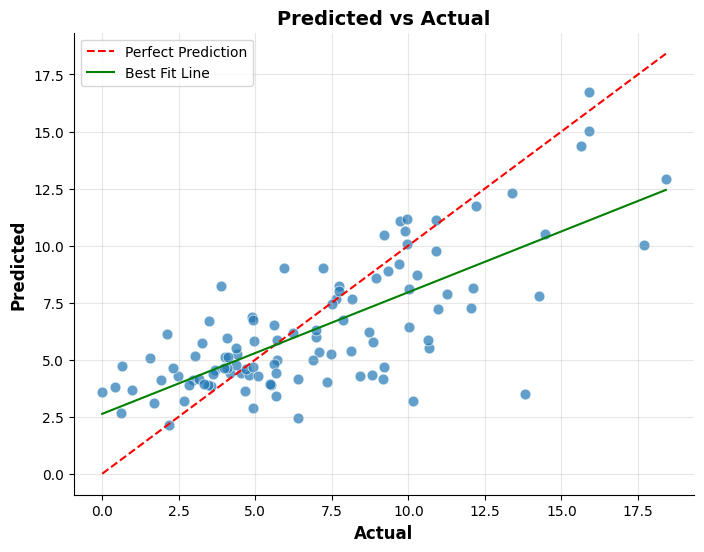

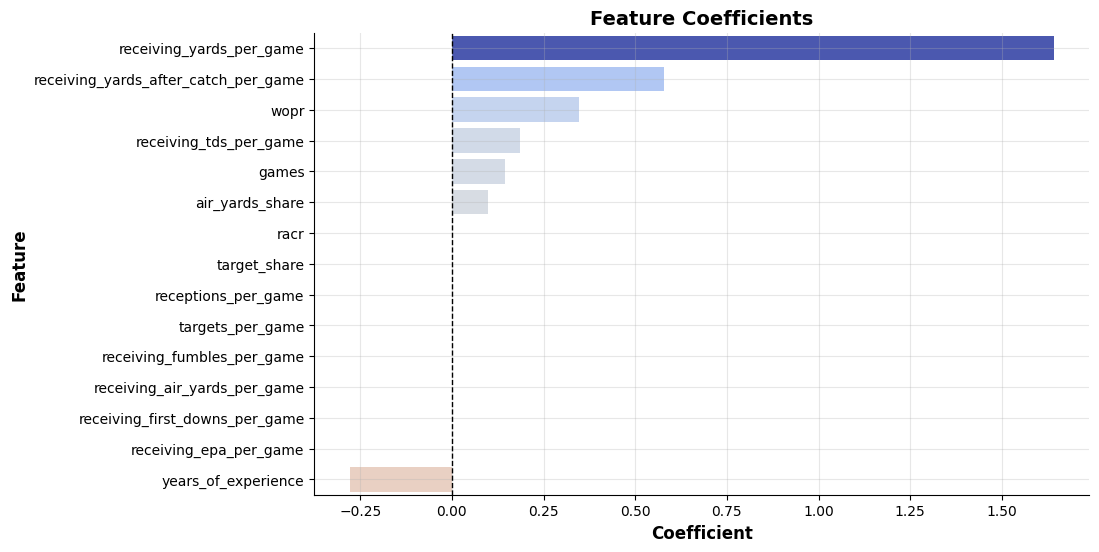

In [149]:
# Calculating and presenting evaluation metrics/graphs for the model
y_pred_te = model_te.predict(X_val_te)

rmse_te = MSE(y_val_te, y_pred_te)**.5
mae_te = MAE(y_val_te, y_pred_te)
r2_te = r2_score(y_val_te, y_pred_te)

print(f'RMSE on Validation Set (TE): {rmse_te:.2f}')
print(f'MAE on Validation Set (TE): {mae_te:.2f}')
print(f'R^2 on Validation Set (TE): {r2_te:.3f}\n')

columns_te = X_val_te.columns

plot_pred_vs_actual(y_val_te, y_pred_te, title = 'Predicted vs Actual')

print('\n')

plot_model_importances(model_te, columns_te)

# Fantasy Football Model Performance Summary

---

## Quarterback (QB) Model
- **Model:** Random Forest Regressor  
- **RMSE:** 3.28  
- **MAE:** 2.41  
- **$R^2$:** 0.228  

## Running Back (RB) Model
- **Model:** Ridge Regression  
- **RMSE:** 3.95  
- **MAE:** 3.15  
- **$R^2$:** 0.490  

## Wide Receiver (WR) Model
- **Model:** Random Forest Regressor  
- **RMSE:** 3.40  
- **MAE:** 2.80  
- **$R^2$:** 0.594  

## Tight End (TE) Model
- **Model:** Lasso Regression  
- **RMSE:** 2.76  
- **MAE:** 1.98  
- **$R^2$:** 0.515  

---

## Metrics Explanation
- **RMSE (Root Mean Squared Error):** Average magnitude of prediction errors, giving higher weight to larger errors. Lower values indicate predictions closer to actual fantasy points per game.  
- **MAE (Mean Absolute Error):** Average absolute difference between predicted and actual values. Provides an intuitive sense of prediction error in the same units as the target.  
- **$R^2$ (Coefficient of Determination):** Proportion of variance in the target variable explained by the model. Higher values indicate the model captures more of the variability in player performance.  

---

## Summary & Notes
- **Predictability varies by position:** RBs, WRs, and TEs appear easier to predict than QBs, as indicated by higher $R^2$ values. QBs have low $R^2$ despite relatively low RMSE and MAE, reflecting high week-to-week variability that the model cannot fully capture.  
- **Model types:** Tree-based models (Random Forest) were used for QB and WR, which can capture nonlinear relationships, while linear models (Ridge, Lasso) were used for RB and TE.  
- **Error interpretation:** RMSE and MAE provide the expected magnitude of prediction errors in **fantasy points per game for next season**. Lower values indicate better predictive accuracy.  
- **Feature importance caution:** For linear models, coefficients may be affected by multicollinearity; for tree-based models, feature importances are more robust.  

**Overall:** The models provide a reasonable predictive baseline, but QBs remain challenging to model accurately due to their high variability. RBs, WRs, and TEs show the strongest predictive signals, suggesting these positions’ next-season fantasy points per game are more consistently influenced by measurable features.


